In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
from keras import datasets
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

from bfcnn import BFCNN, collage

In [2]:
# ==============================================================================

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.disable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# ==============================================================================

In [3]:
# get dataset 
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.astype(np.float32)
x_train = np.expand_dims(x_train, axis=3)
x_test = x_test.astype(np.float32)
x_test = np.expand_dims(x_test, axis=3)

In [4]:
NO_LAYERS = 10
MIN_STD = 10
MAX_STD = 50
EPOCHS = 10
LR_DECAY = 0.9
LR_INITIAL = 0.1
BATCH_SIZE = 32
CLIP_NORMAL = 1.0
INPUT_SHAPE = (28, 28, 1)
PRINT_EVERY_N_BATCHES = 1000

In [5]:
# build model
model = \
    BFCNN(
        input_dims=INPUT_SHAPE, 
        no_layers=NO_LAYERS)

In [6]:
# train dataset
trained_model, history = \
    BFCNN.train(
        model=model, 
        input_dims=INPUT_SHAPE,
        dataset=x_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        min_noise_std=MIN_STD,
        max_noise_std=MAX_STD,
        lr_initial=LR_INITIAL,
        lr_decay=LR_DECAY,
        print_every_n_batches=PRINT_EVERY_N_BATCHES)


2021-03-26 14:59:29,878 INFO model.py:train:328] begin training


Epoch 1/10


/home/arxwn/Repositories/blind_image_denoising/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1875/1875 [==============================] - 69s 35ms/step - batch: 937.0000 - size: 32.0000 - loss: 6.1615 - mae_loss: 6.1615
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - batch: 937.0000 - size: 32.0000 - loss: 2.3883 - mae_loss: 2.3883
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - batch: 937.0000 - size: 32.0000 - loss: 2.1463 - mae_loss: 2.1463
Epoch 4/10
1875/1875 [==============================] - 66s 35ms/step - batch: 937.0000 - size: 32.0000 - loss: 2.1147 - mae_loss: 2.1147
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - batch: 937.0000 - size: 32.0000 - loss: 2.0408 - mae_loss: 2.0408
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - batch: 937.0000 - size: 32.0000 - loss: 2.0070 - mae_loss: 2.0070
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - batch: 937.0000 - size: 32.0000 - loss: 1.8593 - mae_loss: 1.8593
Epoch 8/10
1875/1875 [=======================

2021-03-26 15:10:27,540 INFO model.py:train:345] finished  training


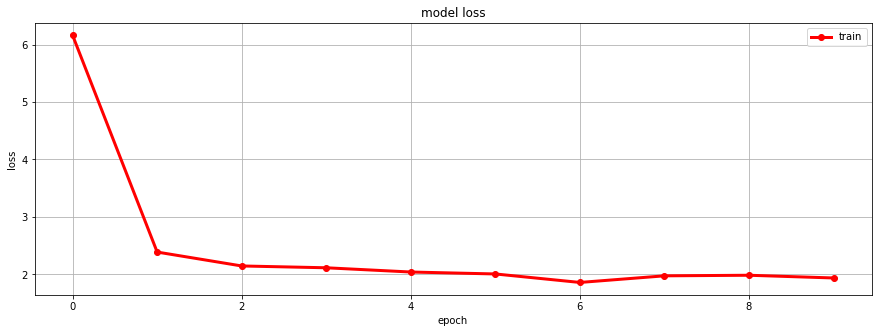

In [7]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history["loss"],
         marker="o",
         color="red", 
         linewidth=3, 
         markersize=6)
plt.grid(True)
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

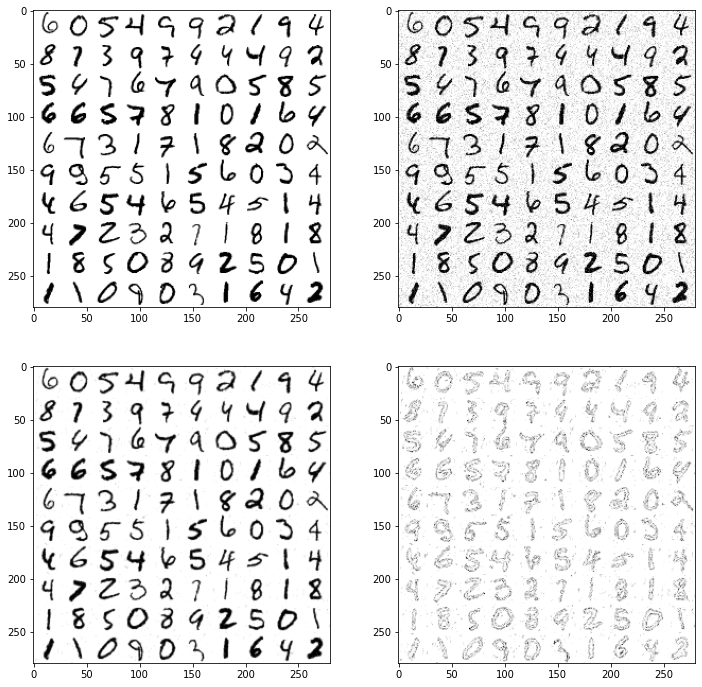

In [23]:
# draw test samples, predictions and diff
sample = x_test[100:200,:,:,:]
noisy_sample = sample + np.random.normal(0.0, 30, sample.shape)
noisy_sample = np.clip(noisy_sample, 0.0, 255.0)
results = trained_model.model.predict(noisy_sample)

plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.imshow(collage(sample), cmap="gray_r") 
plt.subplot(2, 2, 2)
plt.imshow(collage(noisy_sample), cmap="gray_r") 
plt.subplot(2, 2, 3)
plt.imshow(collage(results), cmap="gray_r") 
plt.subplot(2, 2, 4)
plt.imshow(collage(np.abs(sample - results)), cmap="gray_r") 
plt.show() 